Cluster labels: [-1  0  1  2  3  4  5]


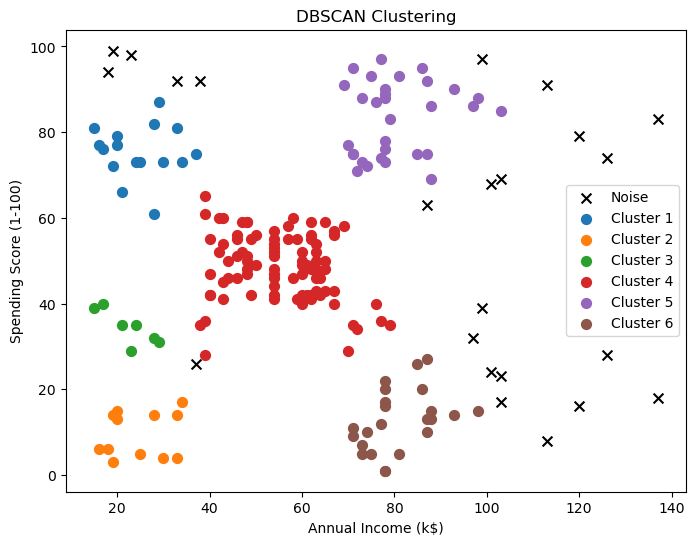

'Notes:\neps=5 is just a starting value. Since your features are in the same scale\n(Income in 15–137, Spending Score in 1–99), you can skip scaling.\nIf clusters don’t look good, adjust eps (try 3 → 10).\n-1 = noise (customers not in any cluster).'

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load your dataset
dataset = pd.read_csv("Mall_Customers.csv")

# Select features for clustering
# Here we take Annual Income (x3) and Spending Score (x4)
X = dataset.iloc[:, [3, 4]].values

# Apply DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=9, min_samples=5).fit(X)   # tune eps for your dataset

#Get cluster labels
labels = db.labels_
print("Cluster labels:", np.unique(labels))

# Add cluster labels to dataset
dataset['Cluster'] = labels

#Plot clusters with legend
plt.figure(figsize=(8,6))
unique_labels = np.unique(labels)

for cluster in unique_labels:
    if cluster == -1:
        # Noise points
        plt.scatter(X[labels == cluster, 0], X[labels == cluster, 1],
                    c='black', marker='x', s=50, label='Noise')
    else:
        # Cluster points
        plt.scatter(X[labels == cluster, 0], X[labels == cluster, 1],
                    s=50, label=f'Cluster {cluster+1}')

plt.title("DBSCAN Clustering")
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])
plt.legend()
plt.show()


'''Notes:
eps=5 is just a starting value. Since your features are in the same scale
(Income in 15–137, Spending Score in 1–99), you can skip scaling.
If clusters don’t look good, adjust eps (try 3 → 10).
-1 = noise (customers not in any cluster).'''
